In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [181]:
def rotational_transform( X,posevec):

    s = np.sin
    c = np.cos
    
    X_h = X
    location = posevec[:3]
    orientation = posevec[3:]
    print(orientation)
    yaw = np.deg2rad(orientation[0])
    pitch = np.deg2rad(orientation[1])
    roll = np.deg2rad(orientation[2])
    trans = np.mat(([1, 0, 0, -location[0]], [0, 1, 0, -location[1]], 
                      [0, 0, 1, -location[2]], [0, 0, 0, 1]))
    r_yaw = np.mat(([c(yaw), -s(yaw), 0, 0], [s(yaw), c(yaw), 0, 0], [0, 0, 1, 0]))
    r_pitch = np.mat(([1, 0, 0], [0, c(pitch), s(pitch)], [0, -s(pitch), c(pitch)]))
    r_roll = np.mat(([c(roll), 0, -s(roll)], [0, 1, 0], [s(roll), 0, c(roll)]))
    r_axis = np.mat(([1, 0, 0], [0, 0, -1], [0, 1, 0]))
    C = r_axis @ r_roll @ r_pitch @ r_yaw @ trans
    Xt = C @ X_h.T
    return Xt.T

def projective_transform(focal,img_w,img_h,X_world):
    x = X_world[0,0]/X_world[0,2]
    y = X_world[0,1]/X_world[0,2]
    u = (x*focal + (img_w/2)) 
    v = (y*focal + (img_h/2))
    coords = (u,v)
    return coords

In [184]:
cliff_pose = np.array([393506.713,6695855.64 ,961.3370,72.08866, -24.53,-2.92])
cliff_focal = np.array([28])

weather_pose = np.array([392875.681,6696842.618,1403.860,106.04, -9,4])
weather_focal = np.array([5736])

tounge_pose = np.array([393797.378,6694756.62 ,767,16.333, 0.35,1.457])
tounge_focal = np.array([28])

In [96]:
cliff_img = mpimg.imread("ref_cliff.JPG")
weather_img = mpimg.imread("ref_wx.JPG")
tounge_img = mpimg.imread("ref_tounge.JPG")
tracker_point = np.array([394368,6696220,854,1])[np.newaxis,:] #point coords in UTM

[ 72.08866 -24.53     -2.92   ]
(3387.6950504059064, 1177.7303484460974)


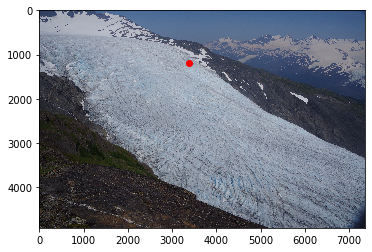

In [189]:
tracker_cliff = rotational_transform(tracker_point,cliff_pose)
tracker_cliff = projective_transform(3893,cliff_img.shape[1],cliff_img.shape[0],tracker_cliff)
plt.imshow(cliff_img)
print(tracker_cliff)
plt.plot(tracker_cliff[0],tracker_cliff[1],'ro')
plt.savefig("cliff_track")

[106.04  -9.     4.  ]
(4386.297438676605, 3409.8690317355986)


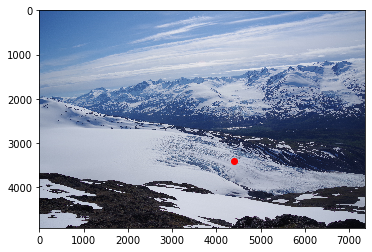

In [188]:
tracker_weather = rotational_transform(tracker_point,weather_pose)
tracker_weather = projective_transform(weather_focal[0],weather_img.shape[1],weather_img.shape[0],tracker_weather)
print(tracker_weather)
plt.imshow(weather_img)
plt.plot(tracker_weather[0],tracker_weather[1],'ro')
plt.savefig("wx_track")

[16.333  0.35   1.457]
(4172.678884723558, 2158.7592543432634)


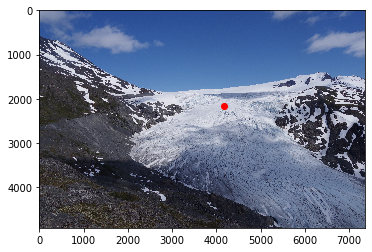

In [186]:
tracker_tounge = rotational_transform(tracker_point,tounge_pose)
tracker_tounge = projective_transform(5753,tounge_img.shape[1],tounge_img.shape[0],tracker_tounge)
print(tracker_tounge)
plt.imshow(tounge_img)
plt.plot(tracker_tounge[0],tracker_tounge[1],'ro')
plt.savefig("tounge_track")